# 线性回归实验
**主要内容**：
- 线性回归方程实现
- 梯度下降效果
- 对比不同梯度下降策略
- 建模曲线分析
- 过拟合与欠拟合
- 正则化的作用
- 提前停止策略
  

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

**回归方程**：
$$
\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+\cdots+\theta_nx_n \tag{1}
$$

$$
MSE(X,h_\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})^2 \tag{2}
$$

$$
\Rightarrow \hat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y \tag{3}
$$

## 回归方程实现

theta =  [[3.7088521 ]
 [3.35110076]]
y_pred=  [[ 3.7088521 ]
 [10.41105361]]


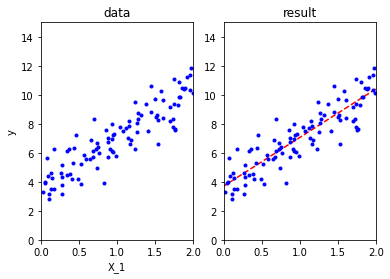

In [2]:
'''初始化随机数据'''
X = 2*np.random.rand(100, 1)
np.random.seed(0)
y = 4 + 3*X + np.random.randn(100, 1)

'''加入一列 X_0'''
X_bias = np.c_[np.ones((100, 1)), X]

'''公式(3)代码实现'''
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

'''给出一个测试数据'''
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta)

print('theta = ', theta)
print('y_pred= ',y_pred)

plt.subplot(1, 2, 1)
plt.plot(X, y, 'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.title('data')

plt.subplot(1, 2, 2)
plt.plot(X_new, y_pred, 'r--')
plt.plot(X, y, 'b.')
plt.title('result')
plt.axis([0,2,0,15])
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X, y)
print('theta=',linear_regression.coef_)
print('bias= ', linear_regression.intercept_)

theta= [[3.35110076]]
bias=  [3.7088521]


## 梯度下降效果

**问题**：
- 步长太小：训练时间长
- 步长太大：容易漏掉最优解，造成振荡
- 局部最低点，全局最低点

**标准化**：将数据进行归一化处理，数据预处理
- 拿到数据之后做一次标准化操作

**批量梯度下降**：

$$
\frac{\partial}{\partial\theta_j}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})x_j^{(i)}
$$

$$
\Rightarrow\nabla_\theta MSE(\theta)=\begin{pmatrix} \frac{\partial}{\partial\theta_0}MSE(\theta)
\\ \frac{\partial}{\partial\theta_1}MSE(\theta)
\\ \vdots
\\\frac{\partial}{\partial\theta_n}MSE(\theta)
\end{pmatrix}=\frac{2}{m}X^T\cdot(X\cdot\theta-y)
$$

In [4]:
lr = 0.1
num_iterations = 1000
m = 100
theta = np.random.randn(2, 1)
for iteration in range(num_iterations):
    gradients = 2/m*X_bias.T.dot(X_bias.dot(theta)-y)
    theta = theta-lr*gradients
print(theta)

[[3.7088521 ]
 [3.35110076]]


In [5]:
X_new_b.dot(theta)

array([[ 3.7088521 ],
       [10.41105361]])

**学习率对结果的影响**

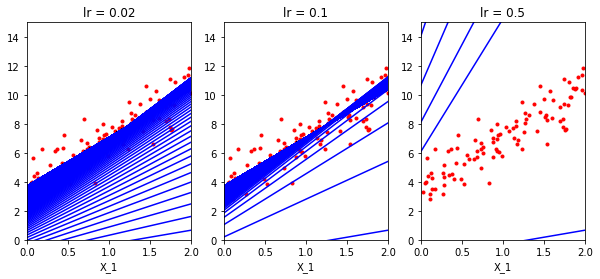

In [6]:
theta_path_bgd = []
def plot_gradient_descent(theta, lr, theta_path=None):
    m = len(X_bias)
    plt.plot(X, y, 'r.')
    num_iterations = 1000
    for iteration in range(num_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b-')
        gradients = 2/m * X_bias.T.dot(X_bias.dot(theta)-y)
        theta = theta -lr*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title('lr = {}'.format(lr))

theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plot_gradient_descent(theta, lr = 0.02)
plt.subplot(1,3,2)
plot_gradient_descent(theta, lr = 0.1, theta_path=theta_path_bgd)
plt.subplot(1,3,3)
plot_gradient_descent(theta, lr = 0.5)
plt.show()

**随机梯度下降**

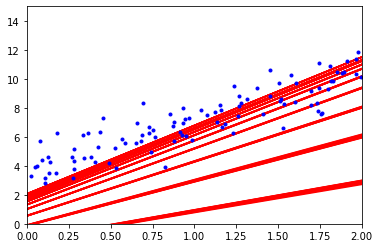

In [7]:
theta_path_sgd = []
m = len(X_bias)
n_epochs = 50

# 衰减策略
t0 = 5
t1 = 50

def learning_schedule(t):
    return t0/(t1+t)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch <10 and i<10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'r-')
        random_index = np.random.randint(m)
        xi = X_bias[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        lr = learning_schedule(n_epochs*m+i)
        theta = theta-lr*gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

**小批量梯度下降**

In [8]:
theta_path_mgd = []
n_epochs = 50
minbatch = 16
theta = np.random.randn(2,1)

t=0

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_bias_shuffled = X_bias[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0,m, minbatch):
        t += 1
        xi = X_bias_shuffled[i:i+minbatch]
        yi = y_shuffled[i:i+minbatch]
        gradients = 2/minbatch * xi.T.dot(xi.dot(theta)-yi)
        lr = learning_schedule(t)
        theta = theta - lr*gradients
        theta_path_mgd.append(theta)

theta

array([[3.67076158],
       [3.38002925]])

## 三种策略对比实验

In [9]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

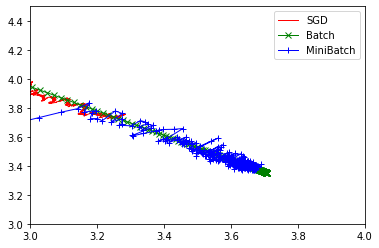

In [10]:
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], 'r-', linewidth=1, label='SGD')
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], 'g-x', linewidth=1, label='Batch')
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], 'b-+', linewidth=1, label='MiniBatch')
plt.legend(loc='upper right')
plt.axis([3,4,3,4.5])
plt.show()


**多项式回归**

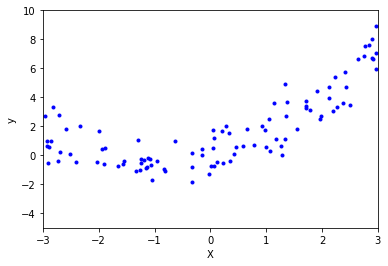

In [11]:
# 定义一组数据
X = 6 * np.random.rand(100, 1) -3 # 定义-3到3之间的100个数
y = 0.5*X**2 + X + np.random.randn(100, 1)

# display
plt.plot(X, y, 'b.')
plt.xlabel('X'), plt.ylabel('y')
plt.axis([-3, 3, -5, 10])
plt.show()

[[0.96201709 0.48744438]]
[0.01491922]


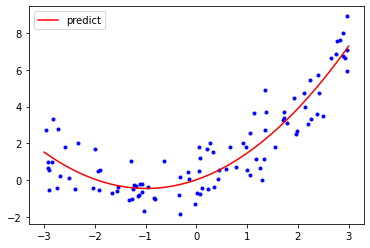

In [12]:
# 数据预处理
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 训练
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.coef_) # 权重参数
print(lin_reg.intercept_)

# 测试数据
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# display
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', label='predict')
plt.legend()
plt.show()

**对比实验**：
- 对比不同 Polynomial degree 值的拟合情况

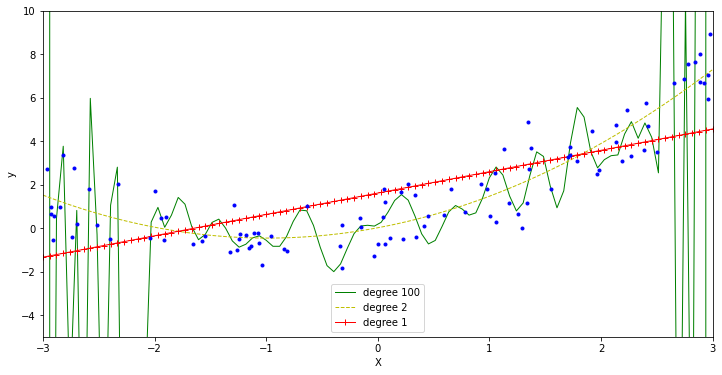

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(12,6))
for style, width, degree in (('g-', 1, 100), ('y--', 1, 2), ('r-+', 1, 1)):
    poly_features = PolynomialFeatures(degree, include_bias=False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    Polynomial_reg = Pipeline([('Poly_fetures', poly_features),
              ('std', std),
              ('lin_reg', lin_reg)])
    Polynomial_reg.fit(X, y)
    y_new_2 = Polynomial_reg.predict(X_new)
    plt.plot(X_new, y_new_2, style, label='degree '+str(degree), linewidth=width)

plt.plot(X, y, 'b.')
plt.xlabel('X'), plt.ylabel('y')
plt.axis([-3, 3, -5, 10])
plt.legend()
plt.show()


绿色线过拟合现象

**数据样本数量对结果的影响**

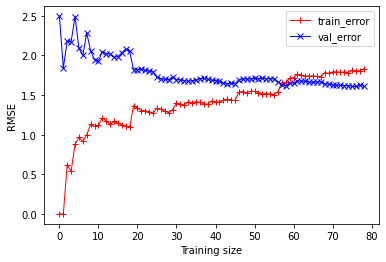

In [14]:
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.model_selection import train_test_split # 数据集切分

def plot_learning_curve(model, X, y): # 定义学习曲线绘制函数
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=1, label='train_error')
    plt.plot(np.sqrt(val_errors), 'b-x', linewidth=1, label='val_error')
    plt.xlabel('Training size')
    plt.ylabel('RMSE')
    plt.legend()

lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.show()

**正则化**

正则化主要作用是防止过拟合，对模型添加正则化项可以限制模型的复杂度，使得模型在复杂度和性能达到平衡。
常用的有L1正则和L2正则。

**岭回归**：

$$
J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2
$$

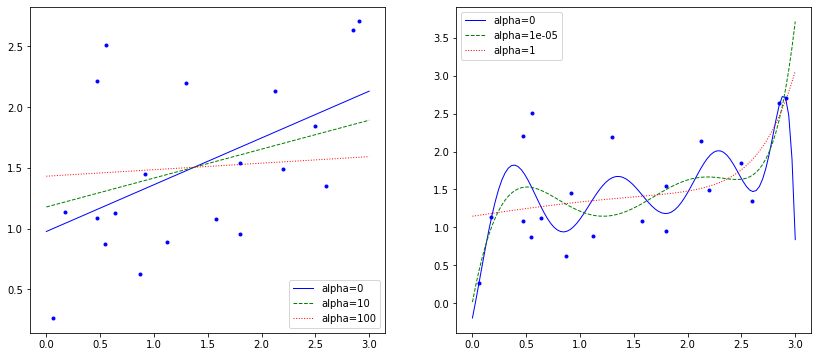

In [16]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 0.5 * X + np.random.randn(m, 1)/1.5 + 1
X_new = np.linspace(0, 3, 100).reshape(100, 1)


def plot_model(model_class, polynomial, alpha, **model_kargs):
    for alpha, style in zip(alpha, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs)
        if polynomial:
            model = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                              ('StandardScaler', StandardScaler()), 
                              ('model', model)])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=1, label='alpha={}'.format(alpha))

    plt.plot(X, y, 'b.')
    plt.legend()


plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alpha=(0, 10, 100))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alpha=(0, 10**-5, 1))

**lasso**:

$$
J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}|\theta_i|
$$

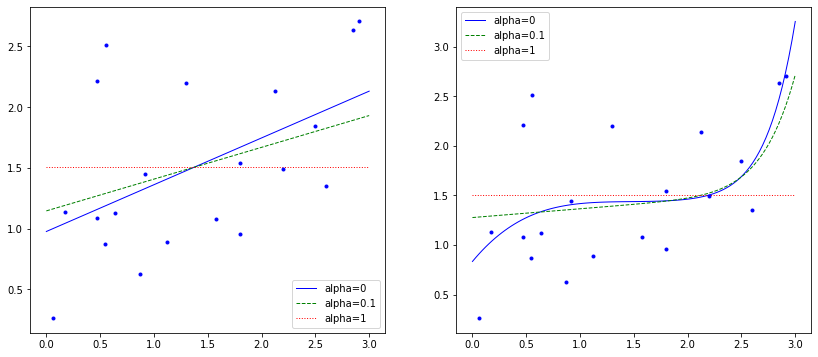

In [19]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alpha=(0,0.1,1))
plt.subplot(122)
plot_model(Lasso, polynomial=True, alpha=(0, 1e-1, 1))
plt.show()